# MNIST Keras

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

C:\Users\shadowleaf\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Data Details

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = max(y_train) + 1
x_train.shape, y_train.shape, x_test.shape, y_test.shape, num_classes

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,), 10)

In [3]:
y_train[0]

5

# Training Data

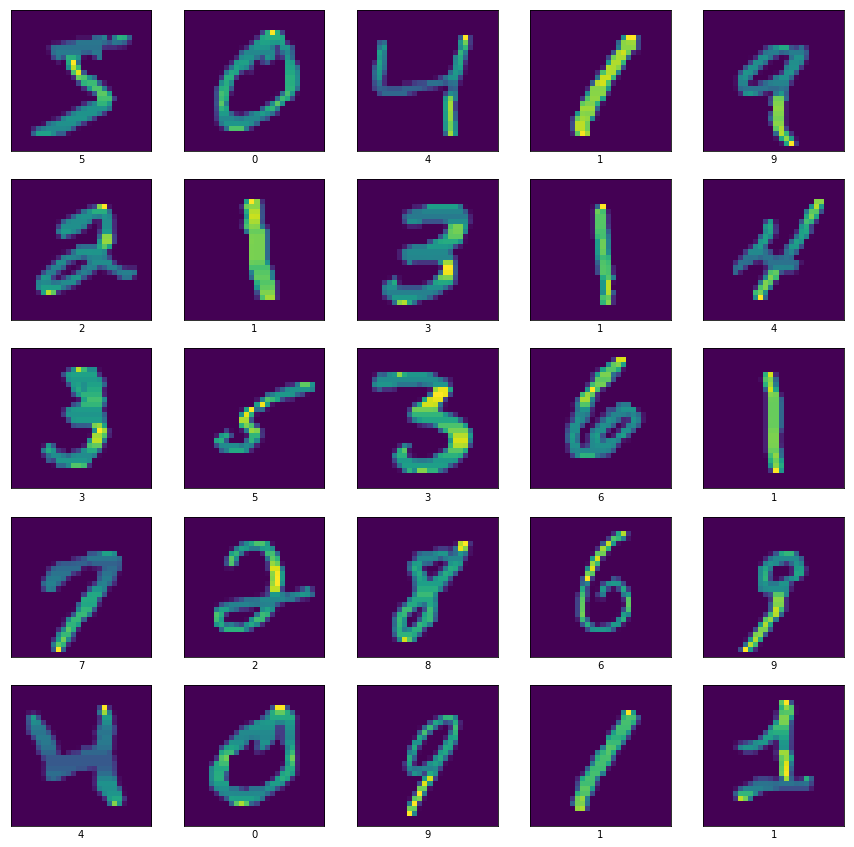

In [61]:
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
x_train = keras.utils.normalize(x_train)
x_test = keras.utils.normalize(x_test)

5

# Fitting the Model

In [66]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=500, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.6561 - acc: 0.8247
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2231 - acc: 0.9339
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1662 - acc: 0.9507
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1322 - acc: 0.9604
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1087 - acc: 0.9673
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0924 - acc: 0.9725
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0793 - acc: 0.9765
Epoch 8/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0690 - acc: 0.9792
Epoch 9/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0610 - acc: 0.9825
Epoch 10/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0528 - acc: 0.9847

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [32]:
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=1)
print('Loss\t\t: {0}\nAccuracy\t: {1}'.format(val_loss, val_acc))

10000/10000 [==============================] - 1s 88us/step
Loss		: 0.09183158046957106
Accuracy	: 0.9728


# Saving the Model

In [69]:
model.save('mnist_keras.model')

In [70]:
old_model = keras.models.load_model('mnist_keras.model')
old_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [73]:
n = 20 # predict the first 20 images
predictions = old_model.predict(x_test[:n])

# Labelling the test images using the model

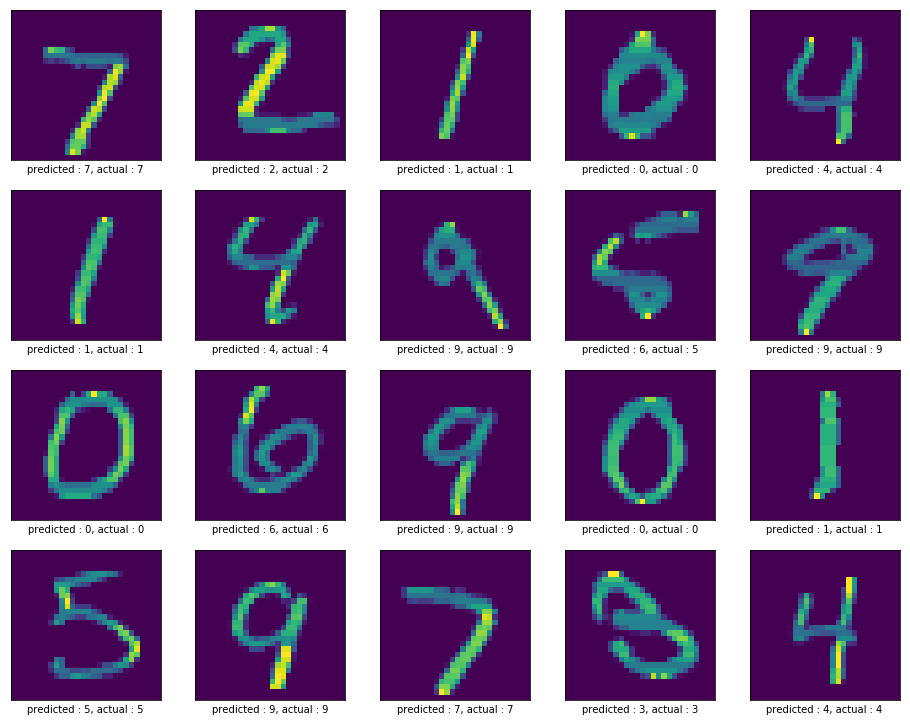

In [82]:
plt.figure(figsize=(16, 16))
for i in range(n):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel('predicted : {0}, actual : {1}'.format(np.argmax(predictions[i]), y_test[i]))